# Quest3

## Part A. Web Scrapping

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
res = req.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")

In [3]:
soup = bs(res.content, "html.parser")

## Parse HTML

In [4]:
tableNode = soup.select('td')

namelist = []
volumelist = []
percentlist = []

# 1~20
# 1 : Name
# 3 : PctChange
# 4 : Volume
for i in range(1,21):
    if i%4 == 0:
        volumelist.append(int(str(tableNode[i]).replace('<td>', '').replace(' </td>', '').replace(',', '')))
        conamestr = re.sub(r'</div>\n</td>', '', re.sub(r'<td>(?s).*coName small">', '', str(tableNode[i-3])))
        conamestr = re.sub(r',(s?).*','',conamestr.replace('Inc.', '').replace('Group', '').replace('Ltd.', '').replace('Technology', ''))
        namelist.append(conamestr.strip())
        percentchange = str(tableNode[i-1])
        if "▼" in percentchange:
            percentchange = float('-' + re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))
        else:
            percentchange = float(re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))

        percentlist.append(percentchange)

print(namelist)
print(volumelist)
print(percentlist)

['Micron', 'Invesco QQQ Trust', 'Apple', 'Marvell', 'JD.com']
[45632121, 40453097, 35791794, 35454503, 24782813]
[0.21, -0.7, -1.8, -0.01, -0.3]


## Volume

In [5]:
%matplotlib inline

x = namelist
yval = volumelist
x_pos = [i for i, _ in enumerate(x)]

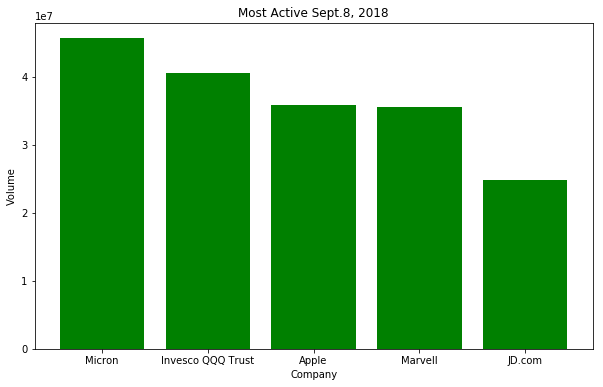

In [6]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='green')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Volume")
plt.title("Most Active Sept.8, 2018")
plt.show()

In [7]:
%matplotlib inline

x = namelist
yval = percentlist
x_pos = [i for i, _ in enumerate(x)]

## Percent Change

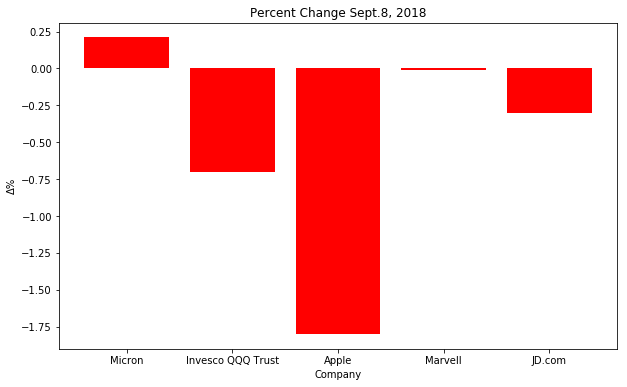

In [8]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Δ%")
plt.title("Percent Change Sept.8, 2018")
plt.show()

## Part B. Timing Comparison

In [9]:
from collections import Counter
import random
from functools import reduce

In [10]:
# Utility function
def runtime(f):
    import timeit
    start = timeit.default_timer()
    f
    end = timeit.default_timer()
    return(end - start) 

In [11]:
# My Function
def wordsInStringToDictWordCount(istr):
    
    return_dict = {}
    
    if len(istr) > 1:      
        temp_list = istr.split()
        
        for i in temp_list:
            if i in return_dict:
                return_dict[i] += 1
            else:
                return_dict[i] = 1
                
    return return_dict

In [12]:
# Counter class
def beatTheCounter(istr):
    cnt = Counter()
    temp_list = istr.split()
    
    for i in temp_list:
        cnt[i] += 1

    return cnt

In [13]:
with open('./lstring.txt', 'r') as fstr:
    longstring = fstr.read().replace('\n', ' ')

In [14]:
mytime = runtime(wordsInStringToDictWordCount(longstring))
cnttime = runtime(beatTheCounter(longstring))
print (mytime)
print (cnttime)

9.469986252952367e-07
7.600028766319156e-07


In [15]:
mytimelist = []
cnttimelist = []

for i in range (0,100):
    mytimelist.append(runtime(wordsInStringToDictWordCount(longstring)))
    cnttimelist.append(runtime(beatTheCounter(longstring)))

In [16]:
avg_mytime = reduce(lambda x, y: (x + y) / 2, mytimelist)
avg_cnttime = reduce(lambda x, y: (x + y) / 2, cnttimelist)

print (avg_mytime)
print (avg_cnttime)

8.029869284328434e-07
6.558525732737519e-07


## Graph

In [32]:
%matplotlib inline

yval = [avg_mytime, avg_cnttime]
x = ["Me", "Counter"]
x_pos = [i for i, _ in enumerate(x)]

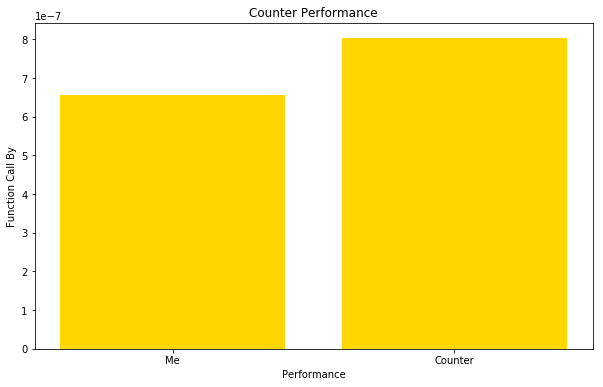

In [33]:
plt.figure(figsize=(10,6))
plt.bar(x, yval, color='gold')
plt.xticks(x_pos, x)
plt.xlabel("Performance")
plt.ylabel("Function Call By")
plt.title("Counter Performance")
plt.show()

I won? Why?

## Part C. Pytest for Regex

In [19]:
import re

def validEmail(address, regex):
    return re.match(regex, address) is not None

In [20]:
my_regex = r'^[A-Za-z0-9][A-Za-z0-9\.]*[A-Za-z0-9]@{1}[a-zA-Z]{1}[A-Za-z\_]*[a-zA-Z]\.{1}[edu|org|com]'

In [21]:
test_address = [
    "abc@smu.edu",    # regular -> true
    "a.b.c@smu.edu",  # multiple dots -> true
    ".abc@smu.edu",   # dot first -> false
    "abc.@smu.edu",   # dot last -> false
    "abcsmu.edu",     # no@ sign -> false
    "abc@s_m_u.edu",  # underscore -> true
    "abc@_smu.edu",   # _ first -> false
    "abc@smu_.edu",   # _ last -> false
    "abc@5mu.edu",    # number in d1 -> false
    "abc@smu.ecu"     # .com, .org, .edu
]

In [22]:
validEmail("This.can.be.one@Email_that_wilL_Satisfy_the_requirements.com", my_regex)

True

# Part D. CSV Files

In [23]:
import csv
import sys
import json
import operator

In [24]:
# example code from https://docs.python.org/3/library/csv.html
templist= []
with open('./worldcup.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        templist.append(row)

csvfile.close()

In [25]:
anotherlist= []

for i in templist:
    for j in i:
        anotherlist.append(j.split(','))


jsonlist = []
        
for i in range(1,22):
    a_json_obj = {
        anotherlist[0][0]:anotherlist[i][0],        
        anotherlist[0][1]:int(anotherlist[i][1]),        
        anotherlist[0][2]:anotherlist[i][2],        
        anotherlist[0][3]:anotherlist[i][3],        
        anotherlist[0][4]:anotherlist[i][4],        
        anotherlist[0][5]:anotherlist[i][5],        
        anotherlist[0][6]:anotherlist[i][6],        
        anotherlist[0][7]:int(anotherlist[i][7]),
        anotherlist[0][8]:int(anotherlist[i][8]),        
        anotherlist[0][9]:int(anotherlist[i][9])            
    }
    
    jsonlist.append(a_json_obj)

# print(json.dumps(jsonlist, indent=2))

In [26]:
jsonlist = sorted(jsonlist, key=lambda k: k['goalsScored'], reverse=True)
print(json.dumps(jsonlist[0:5], indent=2))

[
  {
    "WorldCup": "wc1998",
    "year": 1998,
    "location": "France",
    "first": "France",
    "second": "Brazil",
    "third": "Croatia",
    "fourth": "Netherlands",
    "goalsScored": 171,
    "matchesPlayed": 64,
    "attendance": 2785100
  },
  {
    "WorldCup": "wc2014",
    "year": 2014,
    "location": "Brazil",
    "first": "Germany",
    "second": "Argentina",
    "third": "Netherlands",
    "fourth": "Brazil",
    "goalsScored": 171,
    "matchesPlayed": 64,
    "attendance": 3386810
  },
  {
    "WorldCup": "wc2018",
    "year": 2018,
    "location": "Russia",
    "first": "France",
    "second": "Croatia",
    "third": "Belgium",
    "fourth": "England",
    "goalsScored": 169,
    "matchesPlayed": 64,
    "attendance": 3430000
  },
  {
    "WorldCup": "wc2002",
    "year": 2002,
    "location": "Korea_Japan",
    "first": "Brazil",
    "second": "Germany",
    "third": "Turkey",
    "fourth": "KoreaRepublic",
    "goalsScored": 161,
    "matchesPlayed": 64,
    "a

In [27]:
# Extract the two values needed
yearlist = []
goallist = []

for i in range (0,5):
    yearlist.append(jsonlist[i].get('year'))
    goallist.append(jsonlist[i].get('goalsScored'))

print (yearlist)
print (goallist)

[1998, 2014, 2018, 2002, 2006]
[171, 171, 169, 161, 147]


In [28]:
%matplotlib inline

x = yearlist
yval = goallist
x_pos = [i for i, _ in enumerate(x)]

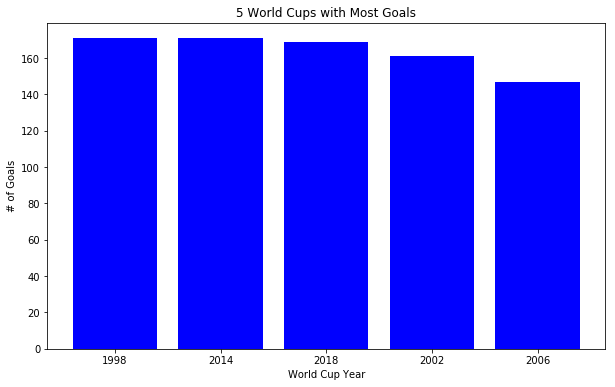

In [29]:
# Graph
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='blue')
plt.xticks(x_pos, x)
plt.xlabel("World Cup Year")
plt.ylabel("# of Goals")
plt.title("5 World Cups with Most Goals")
plt.show()